Car Number:  MH 20EJ 0364


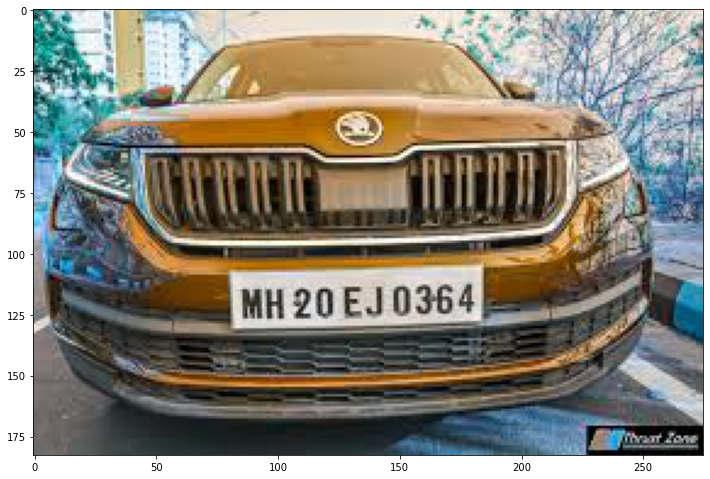

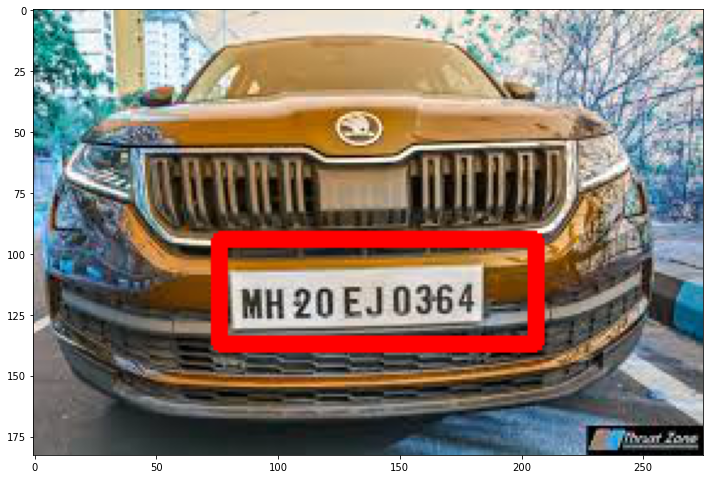

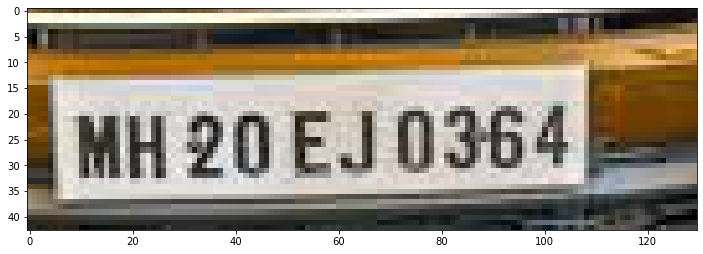

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

car_plate =cv2.imread('C:/Users/LENOVO/Downloads/4.jpg')
display(car_plate)
#car_plate = cv2.cvtColor(car_plate,cv2.COLOR_RGB2GRAY)
#display(car_plate)

def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

#display(car_plate)

plate_cascade = cv2.CascadeClassifier('C:/Users/LENOVO/Downloads/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml')


def detect_plate(img):
    number_plate = img.copy()
    
    plate_rect = plate_cascade.detectMultiScale(number_plate,scaleFactor=1.2)
    
    for (x,y,w,h) in plate_rect:
        img1=cv2.rectangle(number_plate,(x,y),(x+w,y+h),(255,0,0),5)
        
    return number_plate

result = detect_plate(car_plate)
display(result)  
#text = pytesseract.image_to_string(result)
#print(text)

def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.2)
    
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        #blurred_plate = cv2.medianBlur(roi,7)
        
        #plate_img[y:y+h,x:x+w] = blurred_plate
        
    return roi

result = detect_and_blur_plate(car_plate)
display(result)
text = pytesseract.image_to_string(result)
print("Car Number: ",text)